<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Daniela Michel Mercado y Mateo Verea Dorantes


**Fecha:** 22 de noviembre del 2021

**Expediente** : 724506.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/danielamichel/Tarea7-8_DMichel_MVerea/blob/main/Tarea%208.ipynb 
# Tarea 8: Clase 22


Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)

### Ejercicio 1:

Código de solución estudiante 1

In [2]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

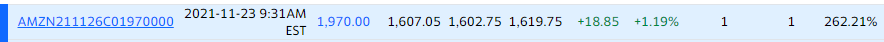

In [3]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

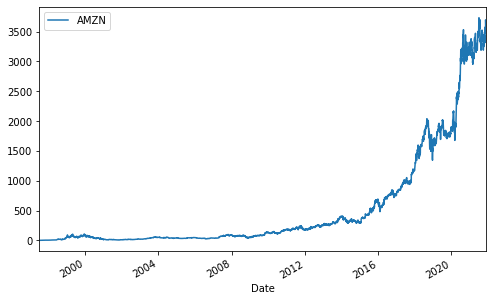

In [4]:
ticker = ['AMZN']
start_date = '1997-07-01'

closes_adbe = get_adj_closes(ticker, start_date)
closes_adbe.plot(figsize=(8,5));
plt.legend(ticker);

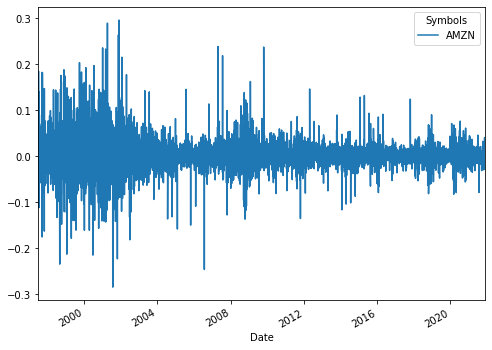

In [5]:
ret_adbe = calc_daily_ret(closes_adbe)
ret_adbe.plot(figsize =(8,6));

In [6]:
#Aqui saque los rendimientos simples y de eso la media y desviacion estandar de los rendimientos
Ri = closes_adbe.pct_change(1).iloc[1:]
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AMZN
Date,
1997-07-02,0.048
1997-07-03,0.203
1997-07-07,0.046
1997-07-08,0.151
1997-07-09,0.009
...,...
2021-11-17,0.002
2021-11-18,0.041
2021-11-19,-0.005


In [7]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-07-15'

nscen = 10000
dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06',
                ...
                '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07',
                '2022-07-08', '2022-07-11', '2022-07-12', '2022-07-13',
                '2022-07-14', '2022-07-15'],
               dtype='datetime64[ns]', length=169, freq='B'), 169)

In [8]:
#De los rendimientos logartimicos obtuvieron usando la media y desviacion estandar 
ri = calc_daily_ret(closes_adbe)
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# Simulamos el rendimiento
dt = 1
Z = np.random.randn(ndays,nscen) 
sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Rendimientos simulados de forma normal
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)

# Simulación del precio
S_0 = closes_adbe.iloc[-1,0]
S_T = S_0*np.exp(sim_ret_ri.cumsum())

In [9]:
mu = ret_adbe.mean()[0]
sigma = ret_adbe.std()[0]
mu, sigma

(0.0012648267982876104, 0.035852519940569524)

In [10]:
# Tasa de bonos de 1 yr de fecha 19/11/2021 -> 0.18%
r = 0.00018/360 # Tasa diaria

In [11]:
today = pd.to_datetime(date.today())
expiry = '2022-07-15'

dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07',
               '2022-07-08', '2022-07-11', '2022-07-12', '2022-07-13',
               '2022-07-14', '2022-07-15'],
              dtype='datetime64[ns]', length=169, freq='B')

In [12]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,0.040,0.052,0.057,...,-0.007,0.050,0.019
2021-11-24,-0.003,0.008,0.037,...,-0.026,0.053,0.028
2021-11-25,0.008,-0.033,0.013,...,-0.038,0.035,-0.034
2021-11-26,0.004,-0.006,-0.037,...,-0.058,0.148,-0.006
2021-11-29,0.043,0.012,-0.058,...,-0.070,0.137,-0.003
...,...,...,...,...,...,...,...
2022-07-11,0.902,0.233,0.137,...,0.105,-0.437,0.457
2022-07-12,0.861,0.185,0.158,...,0.021,-0.442,0.459
2022-07-13,0.874,0.183,0.115,...,0.035,-0.450,0.440
2022-07-14,0.873,0.218,0.138,...,0.088,-0.445,0.476


In [13]:
S0 = closes_adbe.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-11-23,3725.501,3771.661,3791.281,...,3555.586,3762.090,3649.935
2021-11-24,3568.149,3609.157,3716.823,...,3486.878,3776.226,3681.247
2021-11-25,3608.489,3463.075,3627.874,...,3445.159,3708.939,3459.941
2021-11-26,3594.273,3559.393,3448.634,...,3377.303,4151.042,3558.844
2021-11-29,3737.462,3622.606,3376.623,...,3339.158,4104.381,3568.310
...,...,...,...,...,...,...,...
2022-07-11,8820.720,4518.501,4105.770,...,3978.086,2311.996,5654.089
2022-07-12,8469.532,4307.138,4192.886,...,3657.553,2300.880,5664.562
2022-07-13,8580.605,4298.875,4014.754,...,3706.420,2281.949,5556.070
2022-07-14,8571.711,4451.087,4107.972,...,3910.733,2295.064,5761.176


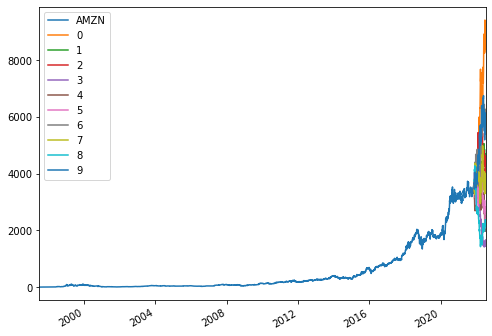

In [14]:
# Precios simulados con los precios descargados
pd.concat([closes_adbe,sim_closes]).plot(figsize = (8,6));

In [15]:
from datetime import date
Hoy = date.today()
expiry = '2022-07-15'
K = 662.5 # strike price
nscen = 100000
dates = pd.date_range(start= Hoy, 
                      periods = ndays)
ndays = len(dates)
S0 = closes_adbe.iloc[-1,0]  # Condición inicial del precio a simular

# simular rendimientos
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

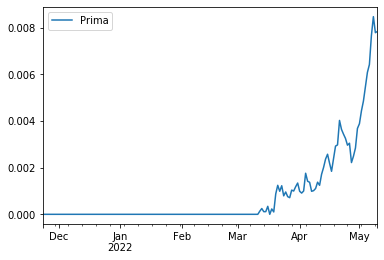

In [16]:
# Valor del call 
strike = 662.5
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, 
                    index = dates)
call.plot();

In [17]:
call.iloc[-1]

Prima    0.008
Name: 2022-05-10 00:00:00, dtype: float64

In [18]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(confianza, loc = mean_est, scale=sigma_est)
print(i1)
print(i2)

(-16.044558127865393, 16.060239411444883)
(-16.04425172913191, 16.0599330127114)


In [20]:
vol = ret_adbe['AMZN'].std()*np.sqrt(252)
media = ret_adbe['AMZN'].mean()*252
maduracion = ndays
st = closes_adbe.iloc[-1,0]
rf = r*360

In [21]:
#Black Scholes
from scipy.stats import norm
d1 = (np.log(st/K)+(rf+(vol**2)/2))/vol
d2 = d1-vol
put = K*np.exp(-rf)*norm.cdf(-d2)-st*norm.cdf(-d1)
print('El valor de la opción con Black Scholes es:',put)
print('Valor de la opción simulado es de:',call.iloc[-1].values)


El valor de la opción con Black Scholes es: 0.3662746174952014
Valor de la opción simulado es de: [0.00784064]


Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.
